<b><font size="6">Predictive Modelling Pipeline Template</font></b><br><br>

In this notebook we present to you the main steps you should follow throughout your project.


<b> Important: The numbered sections and subsections are merely indicative of some of the steps you should pay attention to in your project. <br>You are not required to strictly follow this order or to execute everything in separate cells.</b>
    
<img src="/content/image/process_ML.png" style="height:70px">

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    QuantileTransformer,
    OrdinalEncoder,
)
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    BaggingClassifier,
)

from sklearn.calibration import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

from scipy.stats import chi2_contingency

<a class="anchor" id="">

# 1. Import data (Data Integration)

</a>


<img src="image/step1.png" style="height:60px">

In [5]:
data = pd.read_csv("obesity_train.csv", index_col="id")

<a class="anchor" id="">

# 2. Explore data (Data access, exploration and understanding)

</a>

Remember, this step is very important as it is at this stage that you will really look into the data that you have. Generally speaking, if you do well at this stage, the following stages will be very smooth.

Moreover, you should also take the time to find meaningful patterns on the data: what interesting relationships can be found between the variables and how can that knowledge be inform your future decisions.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1611 entries, 1 to 1611
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        1545 non-null   float64
 1   alcohol_freq               1575 non-null   object 
 2   caloric_freq               1591 non-null   object 
 3   devices_perday             1589 non-null   object 
 4   eat_between_meals          1552 non-null   object 
 5   gender                     1591 non-null   object 
 6   height                     1597 non-null   float64
 7   marrital_status            0 non-null      float64
 8   meals_perday               1602 non-null   float64
 9   monitor_calories           1572 non-null   object 
 10  parent_overweight          1591 non-null   object 
 11  physical_activity_perweek  1046 non-null   object 
 12  region                     1544 non-null   object 
 13  siblings                   1599 non-null   float64
 1

In [7]:
data.head(100)

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
id,,,,,,,,,,,,,,,,,,,,
1,21.0,Never,no,up to 5,Sometimes,Female,1.62,NaN,3.0,no,yes,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,NaN,3.0,no,yes,3 to 4,LatAm,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
3,NaN,Frequently,no,up to 2,Sometimes,Male,1.80,NaN,3.0,no,no,3 to 4,LatAm,2.0,no,Walk,Always,1 to 2,87.0,Overweight_Level_I
4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,NaN,1.0,no,no,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,NaN,3.0,no,no,5 or more,LatAm,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,20.0,Sometimes,yes,up to 2,Frequently,Male,1.72,NaN,3.0,no,yes,NaN,LatAm,3.0,no,Public,Always,less than 1,70.0,Normal_Weight
97,27.0,Frequently,yes,up to 5,Sometimes,Male,1.70,NaN,3.0,no,no,1 to 2,NaN,1.0,no,Public,Always,more than 2,78.0,Overweight_Level_II
98,20.0,Never,yes,up to 5,Frequently,Female,1.58,NaN,4.0,no,yes,1 to 2,LatAm,0.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight


In [8]:
print(data.describe().T)
data.describe(include=["O"]).T

                  count       mean        std    min    25%   50%     75%  \
age              1545.0  24.344984   6.474498   6.00  20.00  23.0   26.00   
height           1597.0   1.704108   0.095567   1.29   1.63   1.7    1.77   
marrital_status     0.0        NaN        NaN    NaN    NaN   NaN     NaN   
meals_perday     1602.0   2.684145   0.817584   1.00   3.00   3.0    3.00   
siblings         1599.0   1.500938   1.132562   0.00   0.00   2.0    3.00   
weight           1558.0  86.956354  26.072339  32.00  67.00  83.0  107.00   

                    max  
age               88.00  
height             2.19  
marrital_status     NaN  
meals_perday       4.00  
siblings           3.00  
weight           193.00  


,count,unique,top,freq
alcohol_freq,1575,4,Sometimes,1057
caloric_freq,1591,2,yes,1400
devices_perday,1589,3,up to 2,708
eat_between_meals,1552,4,Sometimes,1306
gender,1591,2,Male,826
monitor_calories,1572,2,no,1501
parent_overweight,1591,2,yes,1309
physical_activity_perweek,1046,3,1 to 2,595
region,1544,1,LatAm,1544
smoke,1599,2,no,1568


In [9]:
cat_col = data.select_dtypes(include=["object"]).columns
for col in cat_col:
    print(col, data[col].unique())
len(cat_col)

alcohol_freq ['Never' 'Frequently' 'Sometimes' 'Always' nan]
caloric_freq ['no' 'yes' nan]
devices_perday ['up to 5' 'up to 2' 'more than 5' nan]
eat_between_meals ['Sometimes' 'Frequently' 'Never' 'Always' nan]
gender ['Female' 'Male' nan]
monitor_calories ['no' 'yes' nan]
parent_overweight ['yes' 'no' nan]
physical_activity_perweek [nan '3 to 4' '5 or more' '1 to 2']
region ['LatAm' nan]
smoke ['no' 'yes' nan]
transportation ['Public' 'Walk' 'Car' nan 'Bicycle' 'Motorbike']
veggies_freq ['Sometimes' 'Always' 'Never' nan]
water_daily ['1 to 2' 'more than 2' 'less than 1' nan]
obese_level ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


14

In [10]:
data_num = data.select_dtypes(include=np.number)

In [11]:
data_num_cols = data_num.columns

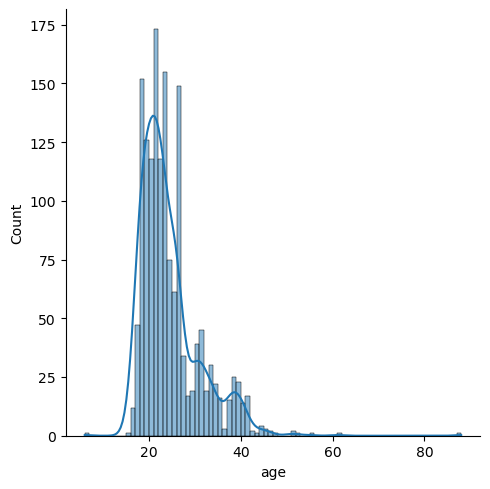

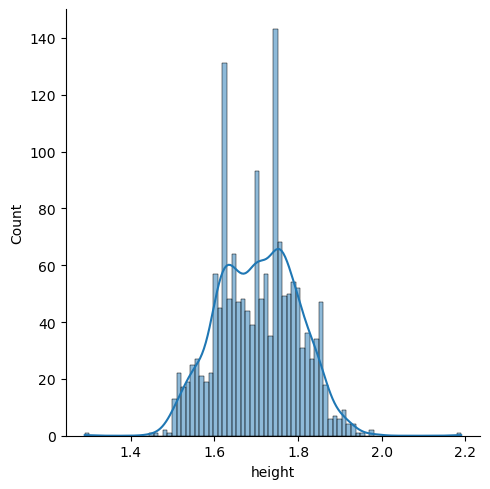

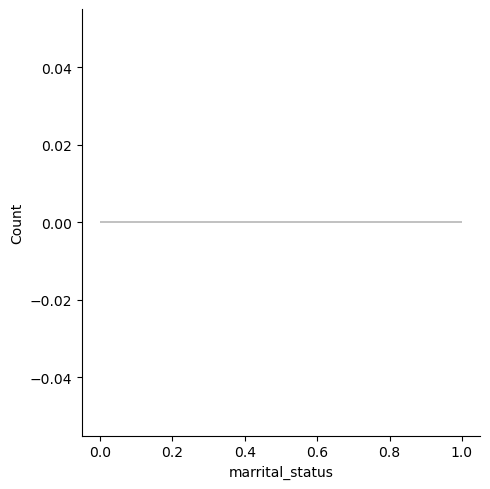

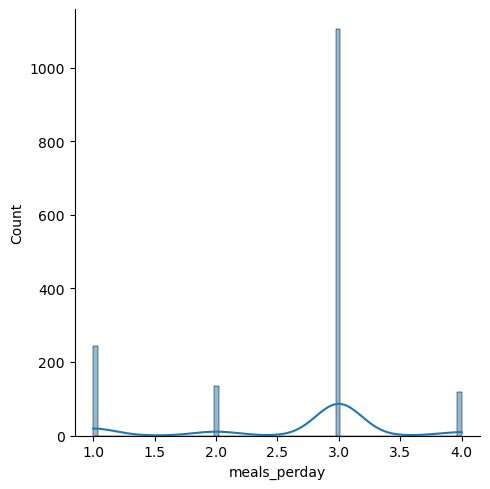

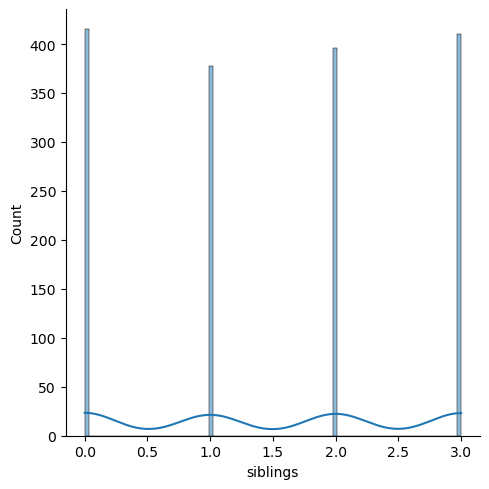

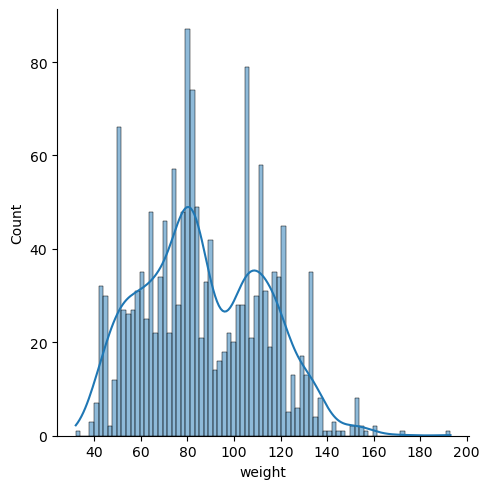

In [12]:
# get some insight about the data sparsity of the numeric variables in the dataset
for col in data_num_cols:
    sns.displot(data[col], bins=82, kde=True)

In [13]:
data.columns

Index(['age', 'alcohol_freq', 'caloric_freq', 'devices_perday',
       'eat_between_meals', 'gender', 'height', 'marrital_status',
       'meals_perday', 'monitor_calories', 'parent_overweight',
       'physical_activity_perweek', 'region', 'siblings', 'smoke',
       'transportation', 'veggies_freq', 'water_daily', 'weight',
       'obese_level'],
      dtype='object')

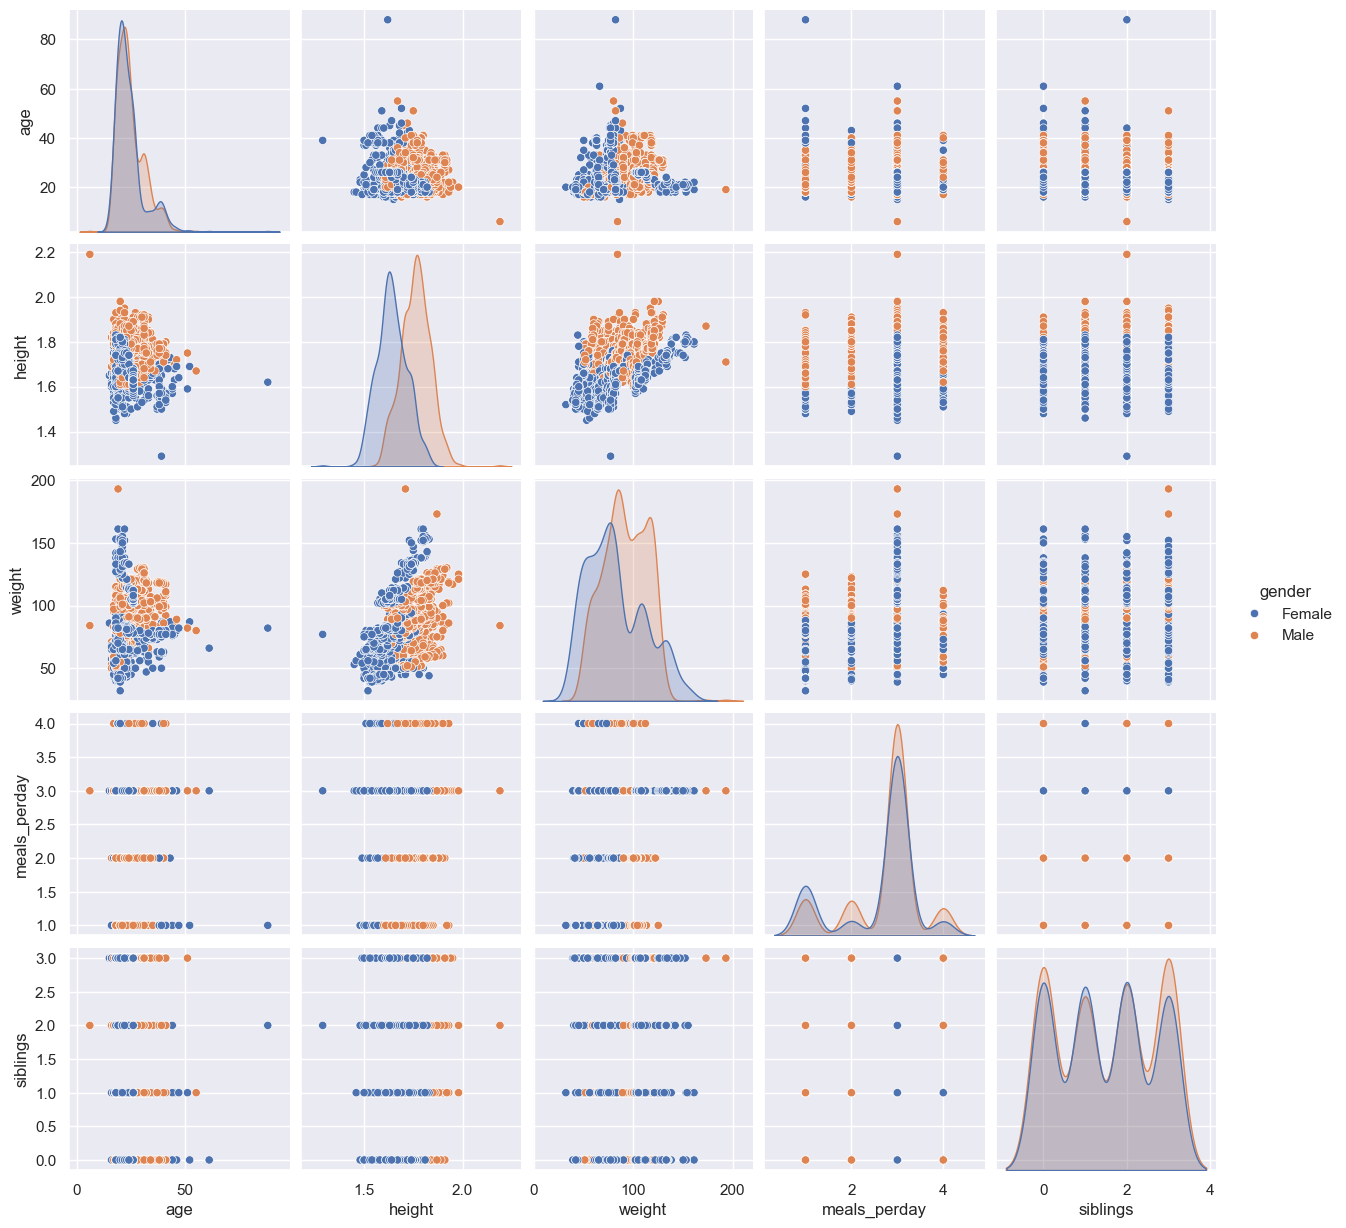

In [14]:
sns.set()
cols = ["age", "weight", "height", "siblings", "meals_perday"]
sns.pairplot(
    data,
    hue="gender",
    diag_kind="kde",
    x_vars=["age", "height", "weight", "meals_perday", "siblings"],
    y_vars=["age", "height", "weight", "meals_perday", "siblings"],
)
plt.show();

In [15]:
def plotly_pie_subplots(data):
    rows = 4
    cols = 4
    specs = [[{"type": "pie"} for _ in range(cols)] for _ in range(rows)]
    fig = make_subplots(rows=rows, cols=cols, specs=specs, subplot_titles=cat_col)

    for i, category in enumerate(cat_col):
        row = i // cols + 1
        col = i % cols + 1
        df = data[category].value_counts(dropna=False).reset_index()
        df.columns = ["labels", "values"]
        pie = go.Pie(
            labels=df["labels"],
            values=df["values"],
            textinfo="label+value+percent",
            name=category,
            showlegend=False,
        )
        fig.add_trace(pie, row=row, col=col)

    fig.update_traces(hoverinfo="label+percent", textinfo="label+value+percent")
    fig.update_layout(
        title_text="Distribution of categorical features", height=1200, width=1200
    )
    fig.show()


plotly_pie_subplots(data)

In [16]:
missing_values_in_row = data.isnull().sum(axis=1).to_list()
for i in range(1, 8):
    print(f"Number of rows with {i} missing values: {missing_values_in_row.count(i)}")

Number of rows with 1 missing values: 734
Number of rows with 2 missing values: 673
Number of rows with 3 missing values: 178
Number of rows with 4 missing values: 20
Number of rows with 5 missing values: 5
Number of rows with 6 missing values: 1
Number of rows with 7 missing values: 0


In [17]:
dup_data = data[data.duplicated()]
dup_data.head()

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
id,,,,,,,,,,,,,,,,,,,,
573,21.0,Sometimes,yes,up to 2,Never,Male,1.62,NaN,1.0,no,no,1 to 2,LatAm,1.0,no,Public,Sometimes,more than 2,70.0,Overweight_Level_I
621,21.0,Sometimes,yes,up to 2,Never,Male,1.62,NaN,1.0,no,no,1 to 2,LatAm,1.0,no,Public,Sometimes,more than 2,70.0,Overweight_Level_I
625,21.0,Sometimes,yes,up to 2,Never,Male,1.62,NaN,1.0,no,no,1 to 2,LatAm,3.0,no,Public,Sometimes,more than 2,70.0,Overweight_Level_I
627,21.0,Sometimes,yes,up to 2,Never,Male,1.62,NaN,1.0,no,no,1 to 2,LatAm,2.0,no,Public,Sometimes,more than 2,70.0,Overweight_Level_I
628,21.0,Sometimes,yes,up to 2,Never,Male,1.62,NaN,1.0,no,no,1 to 2,LatAm,1.0,no,Public,Sometimes,more than 2,70.0,Overweight_Level_I


In [18]:
len(dup_data)

32

### After data exploration step we can conclude that dataset on one side has a lot of missing values and categorical features but on other side clasess are balanced

<a class="anchor" id="">

# 3. Modify data (Data preparation)

</a>

Use this section to apply transformations to your dataset.

Remember that your decisions at this step should be exclusively informed by your **training data**. While you will need to split your data between training and validation, how that split will be made and how to apply the approppriate transformations will depend on the type of model assessment solution you select for your project (each has its own set of advantages and disadvantages that you need to consider). **Please find a list of possible methods for model assessment below**:

1. **Holdout method**
2. **Repeated Holdout method**
3. **Cross-Validation**

__Note:__ Instead of creating different sections for the treatment of training and validation data, you can make the transformations in the same cell. There is no need to create a specific section for that.

### 3.1. Data Preparation

##### Part with dropping rows and columns

In [19]:
# Before moving on with data preparation we will drop a few features

In [21]:
data.drop(
    "marrital_status", axis=1, inplace=True
)  # as you may see from data.info() martial status is completely null, we will drop it
data.drop(
    "region", axis=1, inplace=True
)  # as we seen in plots there is only one region in the dataset (LatAm), we will drop it
data.drop(
    "siblings", axis=1, inplace=True
)  # we believe that amount of siblings is not a good predictor of obesity

In [23]:
# then we can get rid of duplicates, as we dropped 3 features, amount of duplicates increased

In [24]:
dup_data = data[data.duplicated()]
len(dup_data)

90

In [25]:
dup_data

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,smoke,transportation,veggies_freq,water_daily,weight,obese_level
id,,,,,,,,,,,,,,,,,
78,25.0,Sometimes,yes,up to 2,Sometimes,Female,1.57,1.0,no,no,3 to 4,no,Public,Sometimes,1 to 2,55.0,Normal_Weight
138,21.0,Sometimes,yes,up to 2,Never,Male,1.62,1.0,no,no,1 to 2,no,Public,Sometimes,more than 2,70.0,Overweight_Level_I
142,21.0,Sometimes,yes,up to 2,Never,Male,1.62,1.0,no,no,1 to 2,no,Public,Sometimes,more than 2,70.0,Overweight_Level_I
161,22.0,Sometimes,yes,up to 5,Sometimes,Female,1.69,3.0,no,yes,1 to 2,no,Public,Sometimes,1 to 2,65.0,Normal_Weight
350,18.0,Never,yes,up to 5,Frequently,Female,1.62,3.0,no,yes,1 to 2,no,Public,Sometimes,less than 1,55.0,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,26.0,Sometimes,yes,up to 5,Sometimes,Female,1.63,3.0,no,yes,NaN,no,Public,Always,1 to 2,105.0,Obesity_Type_III
1601,26.0,Sometimes,yes,up to 5,Sometimes,Female,1.63,3.0,no,yes,NaN,no,Public,Always,1 to 2,105.0,Obesity_Type_III
1606,22.0,Sometimes,yes,up to 5,Sometimes,Female,1.73,3.0,no,yes,3 to 4,no,Public,Always,1 to 2,133.0,Obesity_Type_III


In [26]:
data = data.drop_duplicates(keep="last")

##### Train/val split

In [27]:
X = data.drop("obese_level", axis=1)
y = data["obese_level"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=0, shuffle=True
)

In [28]:
y_train_str = y_train.copy()
y_val_str = y_val.copy()


#### Encoding categorical columns

In [29]:
X_train_enc = X_train.copy()
X_val_enc = X_val.copy()

In [30]:
# Label encoding for non ordinal categorical features
# We want to keep missing values on this step because in the future we will impute them
# So the code looks harder, because we work only with not none values

cat_col_label_enc = [
    "caloric_freq",
    "gender",
    "monitor_calories",
    "parent_overweight",
    "smoke",
    "transportation",
]

label_enc_dict = {}  # for future purpose

for col in cat_col_label_enc:
    valid_data = X_train_enc[col].dropna()

    lenc = LabelEncoder()
    lenc.fit(valid_data.unique())

    X_train_enc.loc[X_train_enc[col].notna(), col] = lenc.transform(
        X_train_enc.loc[X_train_enc[col].notna(), col]
    )
    X_val_enc.loc[X_val_enc[col].notna(), col] = lenc.transform(
        X_val_enc.loc[X_val_enc[col].notna(), col]
    )

    label_enc_dict[col] = lenc

In [31]:
# OrdinalEncoder for ordinal categorical features

cat_col_ord_enc = [
    "alcohol_freq",
    "devices_perday",
    "eat_between_meals",
    "physical_activity_perweek",
    "veggies_freq",
    "water_daily",
]

order = {
    "alcohol_freq": ["Never", "Sometimes", "Frequently", "Always"],
    "devices_perday": ["up to 2", "up to 5", "more than 5"],
    "eat_between_meals": ["Never", "Sometimes", "Frequently", "Always"],
    "physical_activity_perweek": ["1 to 2", "3 to 4", "5 or more"],
    "veggies_freq": ["Never", "Sometimes", "Always"],
    "water_daily": ["less than 1", "1 to 2", "more than 2"],
}

ordinal_enc_dict = {}  # for future purpose

for col in cat_col_ord_enc:
    ordenc = OrdinalEncoder(
        categories=[order[col]],
        handle_unknown="use_encoded_value",
        unknown_value=np.nan,
    )
    ordenc.fit(X_train_enc[[col]])
    X_train_enc[col] = ordenc.transform(X_train_enc[[col]]).flatten()
    X_val_enc[col] = ordenc.transform(X_val_enc[[col]]).flatten()

    ordinal_enc_dict[col] = ordenc


In [32]:
target_ord_enc = OrdinalEncoder(
    categories=[
        [
            "Insufficient_Weight",
            "Normal_Weight",
            "Overweight_Level_I",
            "Overweight_Level_II",
            "Obesity_Type_I",
            "Obesity_Type_II",
            "Obesity_Type_III",
        ]
    ]
)

target_ord_enc.fit(y_train.to_frame())
y_train_enc = pd.DataFrame(
    target_ord_enc.transform(y_train.to_frame()), columns=["obese_level"]
)
y_val_enc = pd.DataFrame(
    target_ord_enc.transform(y_val.to_frame()), columns=["obese_level"]
)

In [33]:
X_train.head(5)

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,smoke,transportation,veggies_freq,water_daily,weight
id,,,,,,,,,,,,,,,,
266,17.0,Sometimes,no,more than 5,Sometimes,Male,1.75,3.0,no,yes,5 or more,no,Walk,Sometimes,less than 1,70.0
500,22.0,Never,yes,up to 5,Frequently,Female,1.69,4.0,no,yes,NaN,no,Public,Always,1 to 2,51.0
552,18.0,Sometimes,yes,up to 5,Sometimes,Male,1.74,3.0,no,yes,1 to 2,no,Public,Sometimes,1 to 2,51.0
875,19.0,Sometimes,no,up to 2,Sometimes,Male,1.66,1.0,no,yes,NaN,no,Public,Sometimes,more than 2,77.0
1167,31.0,Sometimes,yes,up to 5,Sometimes,Male,1.75,3.0,no,yes,1 to 2,yes,Car,Always,1 to 2,120.0


In [34]:
X_train_enc.head(5)

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,smoke,transportation,veggies_freq,water_daily,weight
id,,,,,,,,,,,,,,,,
266,17.0,1.0,0,2.0,1.0,1,1.75,3.0,0,1,2.0,0,4,1.0,0.0,70.0
500,22.0,0.0,1,1.0,2.0,0,1.69,4.0,0,1,NaN,0,3,2.0,1.0,51.0
552,18.0,1.0,1,1.0,1.0,1,1.74,3.0,0,1,0.0,0,3,1.0,1.0,51.0
875,19.0,1.0,0,0.0,1.0,1,1.66,1.0,0,1,NaN,0,3,1.0,2.0,77.0
1167,31.0,1.0,1,1.0,1.0,1,1.75,3.0,0,1,0.0,1,1,2.0,1.0,120.0


#### Working with missing values

In [35]:
imputer = KNNImputer(n_neighbors=3, weights="uniform", metric="nan_euclidean")
imputer.fit(X_train_enc)
X_train_enc_imp = imputer.transform(X_train_enc)
X_val_enc_imp = imputer.transform(X_val_enc)

In [36]:
X_train_enc_imp = pd.DataFrame(X_train_enc_imp, columns=X_train_enc.columns)
X_val_enc_imp = pd.DataFrame(X_val_enc_imp, columns=X_val_enc.columns)

In [37]:
X_train_enc_imp.head(5)

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,smoke,transportation,veggies_freq,water_daily,weight
0,17.0,1.0,0.0,2.0,1.0,1.0,1.75,3.0,0.0,1.0,2.000000,0.0,4.0,1.0,0.0,70.0
1,22.0,0.0,1.0,1.0,2.0,0.0,1.69,4.0,0.0,1.0,0.666667,0.0,3.0,2.0,1.0,51.0
2,18.0,1.0,1.0,1.0,1.0,1.0,1.74,3.0,0.0,1.0,0.000000,0.0,3.0,1.0,1.0,51.0
3,19.0,1.0,0.0,0.0,1.0,1.0,1.66,1.0,0.0,1.0,0.333333,0.0,3.0,1.0,2.0,77.0
4,31.0,1.0,1.0,1.0,1.0,1.0,1.75,3.0,0.0,1.0,0.000000,1.0,1.0,2.0,1.0,120.0


In [38]:
columns_to_round = [
    "caloric_freq",
    "gender",
    "monitor_calories",
    "parent_overweight",
    "smoke",
    "transportation",
    "alcohol_freq",
    "devices_perday",
    "eat_between_meals",
    "physical_activity_perweek",
    "veggies_freq",
    "water_daily",
]

X_train_enc_imp[columns_to_round] = (
    X_train_enc_imp[columns_to_round].round().astype(int)
)
X_val_enc_imp[columns_to_round] = X_val_enc_imp[columns_to_round].round().astype(int)

### 3.2. Feature Engineering

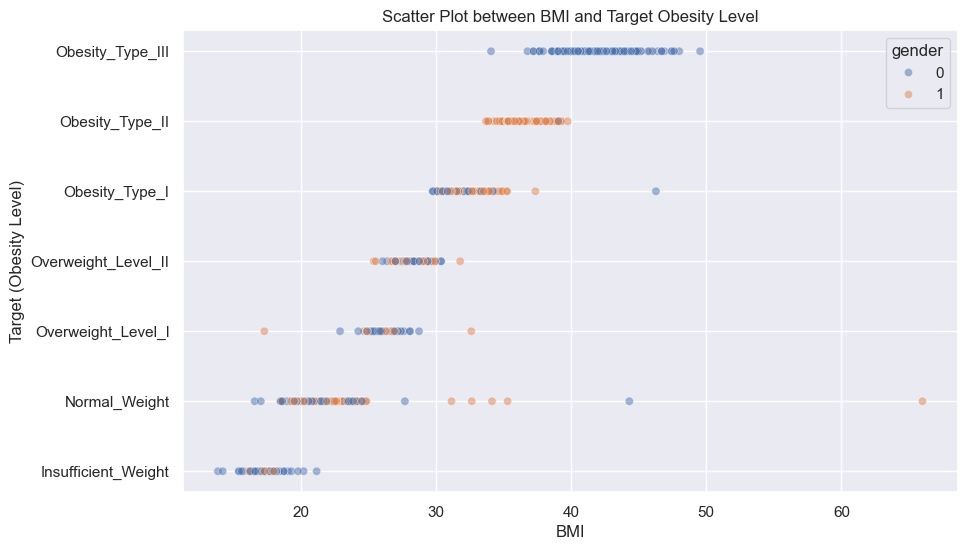

In [39]:
# let's add a new variable - Body Mass Index (BMI).
# This variable is a good estimator of obesity level by height and weight, you may read about it more in wiki
X_train_enc_imp["BMI"] = X_train_enc_imp["weight"] / (X_train_enc_imp["height"] ** 2)
X_val_enc_imp["BMI"] = X_val_enc_imp["weight"] / (X_val_enc_imp["height"] ** 2)
# and let's make a plot for our new variable
obese_level_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III",
]
y_train_reset_index = y_train.reset_index()
Xy = X_train_enc_imp.join(y_train_reset_index)
Xy["obese_level"] = pd.Categorical(
    Xy["obese_level"], categories=obese_level_order[::-1]
)
Xy.drop("id", axis=1, inplace=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Xy, x="BMI", y="obese_level", alpha=0.5, hue="gender")
plt.ylabel("Target (Obesity Level)")
plt.title("Scatter Plot between BMI and Target Obesity Level")
plt.show()

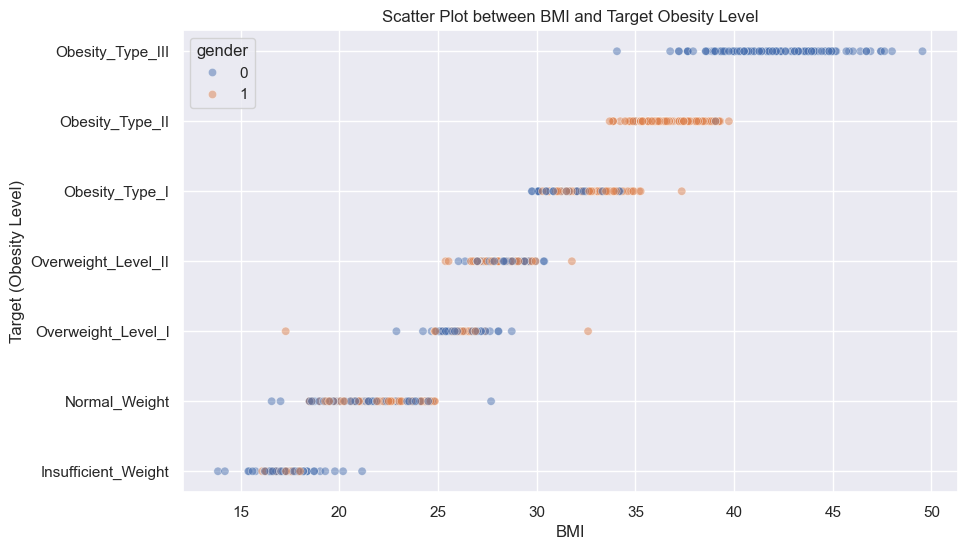

In [40]:
# Let's manually delete all the outliers

index_1 = Xy[(Xy["BMI"] > 30) & (Xy["obese_level"] == "Normal_Weight")].index
Xy = Xy.drop(index_1).reset_index(
    drop=True
)  # the outliers with BMI > 40 and low obese level

index_2 = Xy[(Xy["BMI"] > 40) & (Xy["obese_level"] == "Obesity_Type_I")].index
Xy = Xy.drop(index_2).reset_index(
    drop=True
)  # outlier with BMI > 40 and obese level type 1

index_3 = Xy[(Xy["BMI"] < 23) & (Xy["obese_level"] == "Overweight_Level_II")].index
Xy = Xy.drop(index_3).reset_index(
    drop=True
)  # outlier with BMI < 20 and overweight level 2

# Let's take a look on plot now
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Xy, x="BMI", y="obese_level", alpha=0.5, hue="gender")
plt.ylabel("Target (Obesity Level)")
plt.title("Scatter Plot between BMI and Target Obesity Level")
plt.show()

### 3.3. Scaling

In [41]:
scale_transformer = StandardScaler()
X_train_enc_imp = Xy.drop("obese_level", axis=1)
y_train_str = Xy["obese_level"]

y_train_enc = pd.DataFrame(
    target_ord_enc.transform(y_train_str.to_frame()), columns=["obese_level"]
)
scale_transformer.fit(X_train_enc_imp)
X_train_enc_imp_scl = pd.DataFrame(
    scale_transformer.transform(X_train_enc_imp), columns=X_train_enc_imp.columns
)
X_val_enc_imp_scl = pd.DataFrame(
    scale_transformer.transform(X_val_enc_imp), columns=X_val_enc_imp.columns
)

# We have classification problem so we don't need to scale target

In [42]:
transformer2 = RobustScaler()

X_train_enc_imp_rb = pd.DataFrame(
    transformer2.fit_transform(X_train_enc_imp), columns=X_train_enc_imp.columns
)
X_val_enc_imp_rb = pd.DataFrame(
    transformer2.fit_transform(X_val_enc_imp), columns=X_val_enc_imp.columns
)


In [43]:
transformer3 = MinMaxScaler()

X_train_enc_imp_mm = pd.DataFrame(
    transformer3.fit_transform(X_train_enc_imp), columns=X_train_enc_imp.columns
)
X_val_enc_imp_mm = pd.DataFrame(
    transformer3.fit_transform(X_val_enc_imp), columns=X_val_enc_imp.columns
)


In [44]:
# It transforms features so that their distributions match a specified target distribution (uniform or normal) across the entire dataset.
transformer4 = QuantileTransformer()

X_train_enc_imp_qt = pd.DataFrame(
    transformer4.fit_transform(X_train_enc_imp), columns=X_train_enc_imp.columns
)
X_val_enc_imp_qt = pd.DataFrame(
    transformer4.fit_transform(X_val_enc_imp), columns=X_val_enc_imp.columns
)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning:

n_quantiles (1000) is greater than the total number of samples (457). n_quantiles is set to n_samples.



In [45]:
# correlation
def cor_heatmap(cor):
    fig, ax = plt.subplots(figsize=(12, 10))
    fig = sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds, fmt=".1")
    return fig


cor_spearman = X_train_enc_imp_scl.join(y_train_enc).corr(method="spearman")

<Axes: >

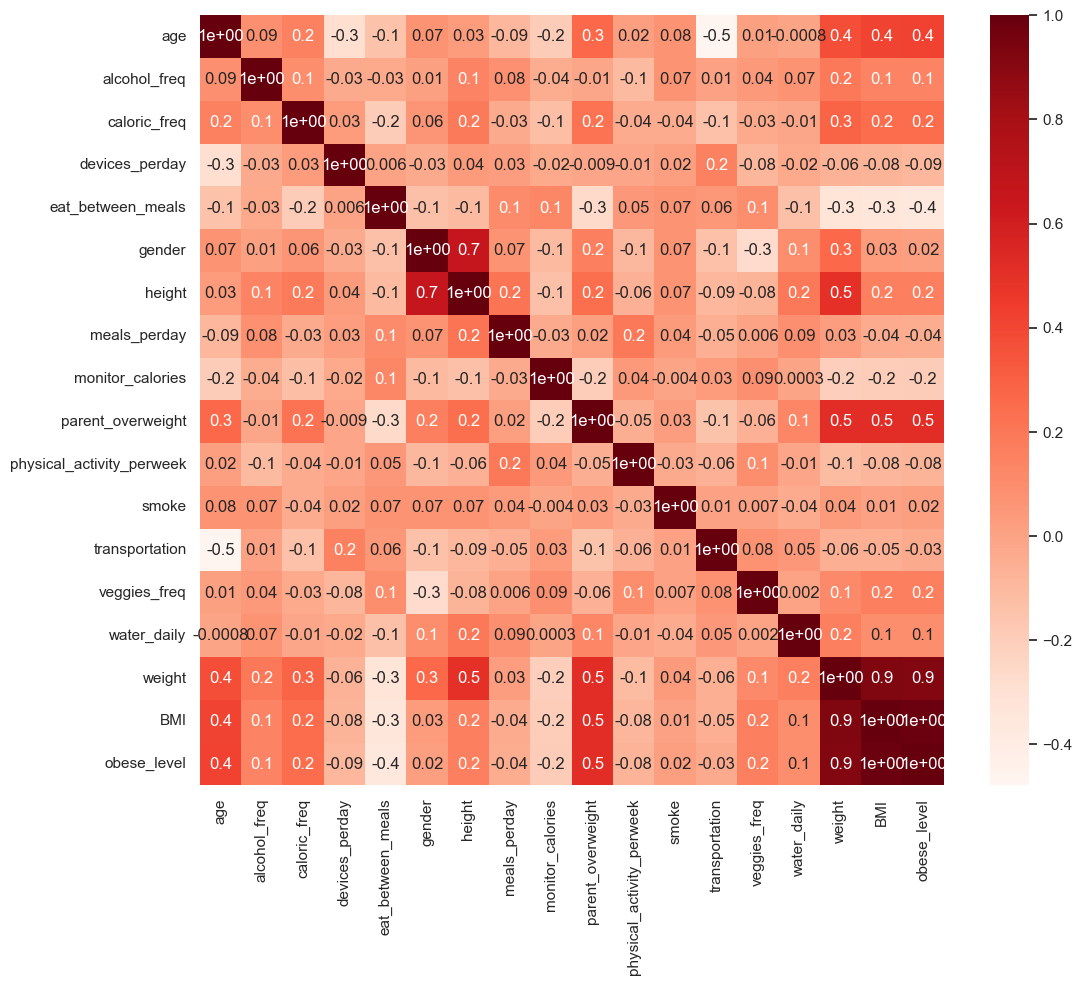

In [46]:
cor_heatmap(cor_spearman)

### 3.4. Feature Selection

In [47]:
X_train = X_train_enc_imp_scl.copy()
X_val = X_val_enc_imp_scl.copy()
y_train = y_train_enc.values.ravel().copy()
y_val = y_val_enc.values.ravel().copy()
# change to original names

In [48]:
print(
    X_train.shape,
    X_val.shape,
    X_train_enc_imp.shape,
    y_train.shape,
    y_val.shape,
    y_train_str.shape,
)

(1057, 17) (457, 17) (1057, 17) (1057,) (457,) (1057,)


In [49]:
# with Robust Scaler
X_train2 = X_train_enc_imp_rb.copy()
X_val2 = X_val_enc_imp_rb.copy()

In [50]:
# with MinMax Scaler
X_train3 = X_train_enc_imp_mm.copy()
X_val3 = X_val_enc_imp_mm.copy()

In [51]:
# with QuantileTransformer
X_train4 = X_train_enc_imp_qt.copy()
X_val4 = X_val_enc_imp_qt.copy()

In [52]:
cat_data = X_train.dropna(
    subset=[
        "age",
        "alcohol_freq",
        "caloric_freq",
        "devices_perday",
        "gender",
        "height",
        "monitor_calories",
        "parent_overweight",
        "physical_activity_perweek",
        "smoke",
        "transportation",
        "veggies_freq",
        "water_daily",
    ]
)

chi2_results = {}
for column in cat_data.columns:
    contingency_table = pd.crosstab(cat_data[column], y_train_str)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[column] = {"chi2_stat": chi2, "p_value": p}

chi2_results

sorted_chi2 = sorted(chi2_results.items(), key=lambda x: x[1]["p_value"])

sorted_list = [
    (var, res["chi2_stat"], res["p_value"])
    for var, res in sorted_chi2
    if res["p_value"] > 0.0000001
]
sorted_list

[('smoke', 19.58619305297562, 0.003280096141617505)]

In [53]:
X_train.drop(
    ["weight", "eat_between_meals", "meals_perday", "smoke"], axis=1, inplace=True
)
X_val.drop(
    ["weight", "eat_between_meals", "meals_perday", "smoke"], axis=1, inplace=True
)

X_train2.drop(
    ["weight", "eat_between_meals", "meals_perday", "smoke"], axis=1, inplace=True
)
X_val2.drop(
    ["weight", "eat_between_meals", "meals_perday", "smoke"], axis=1, inplace=True
)

X_train3.drop(
    ["weight", "eat_between_meals", "meals_perday", "smoke"], axis=1, inplace=True
)
X_val3.drop(
    ["weight", "eat_between_meals", "meals_perday", "smoke"], axis=1, inplace=True
)

X_train4.drop(
    ["weight", "eat_between_meals", "meals_perday", "smoke"], axis=1, inplace=True
)
X_val4.drop(
    ["weight", "eat_between_meals", "meals_perday", "smoke"], axis=1, inplace=True
)

<Axes: xlabel='weight', ylabel='BMI'>

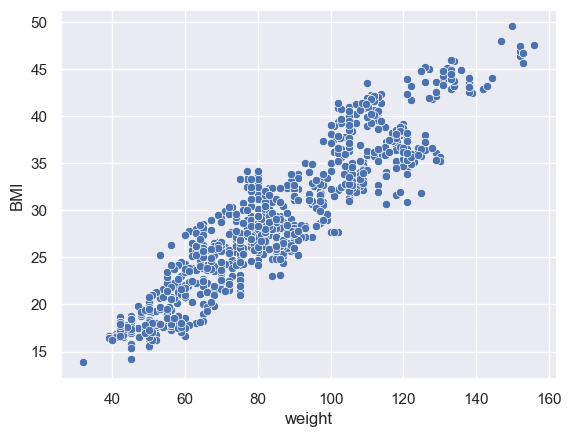

In [54]:
# Do we drop only weight or weight and height when we use BMI instead?
sns.scatterplot(data=Xy, x="weight", y="BMI")

<Axes: xlabel='height', ylabel='BMI'>

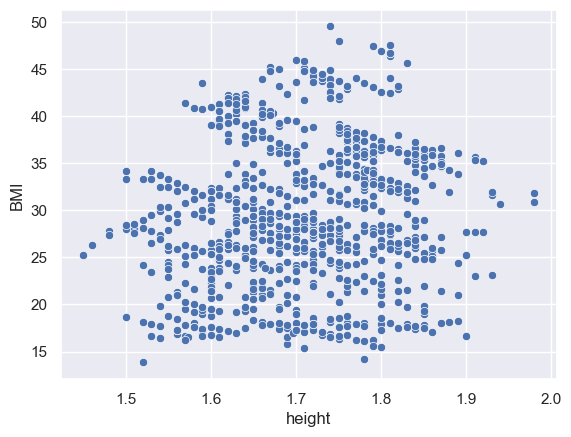

In [55]:
sns.scatterplot(data=Xy, x="height", y="BMI")

<a class="anchor" id="">

# 4 & 5. Model & Assess (Modelling and Assessment)

</a>

<img src="image/step4.png" style="height:60px">

### 4.1. Model Selection

In this section you should take the time to train different predictive algorithms with the data that got to this stage and **use the approppriate model assessment metrics to decide which model you think is the best to address your problem**.

**You are expected to present on your report the model performances of the different algorithms that you tested and discuss what informed your choice for a specific algorithm**

Logistic Regression

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lin = log_reg.predict(X_val)
f1_lin = f1_score(y_val, y_pred_lin, average="macro")
print(f1_lin)


0.8458883461648848


In [57]:
log_reg = LogisticRegression(multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred_lin = log_reg.predict(X_val)
f1_lin = f1_score(y_val, y_pred_lin, average="macro")
print(f1_lin)

0.8458883461648848


kNN classifier


In [59]:
# changing the dimension of y_train
y_train_KNN = y_train
print(y_train_KNN.shape)
y_val_KNN = y_val
y_val_KNN.shape

(1057,)


(457,)

In [60]:
KNN_model_e = KNeighborsClassifier(n_neighbors=11, metric="euclidean").fit(
    X=X_train, y=y_train_KNN
)
print(
    "Accuracy score KNN Train (Standard Scaler): ",
    KNN_model_e.score(X_train, y_train_KNN),
)
print(
    "Accuracy score KNN Validation (Standard Scaler): ",
    KNN_model_e.score(X_val, y_val_KNN),
)
pred_KNN = KNN_model_e.predict(X_val)
print("F1-score KNN (Standard Scaler)", f1_score(y_val_KNN, pred_KNN, average="macro"))
print()

Accuracy score KNN Train (Standard Scaler):  0.7559129612109745
Accuracy score KNN Validation (Standard Scaler):  0.6849015317286652
F1-score KNN (Standard Scaler) 0.674954086294912



In [61]:
KNN_model_m = KNeighborsClassifier(n_neighbors=11, metric="manhattan").fit(
    X=X_train, y=y_train_KNN
)
print(
    "Accuracy score KNN Train (Standard Scaler): ",
    KNN_model_m.score(X_train, y_train_KNN),
)
print(
    "Accuracy score KNN Validation (Standard Scaler): ",
    KNN_model_m.score(X_val, y_val_KNN),
)
pred_KNN = KNN_model_m.predict(X_val)
print("F1-score KNN (Standard Scaler)", f1_score(y_val_KNN, pred_KNN, average="macro"))
print()

Accuracy score KNN Train (Standard Scaler):  0.8164616840113529
Accuracy score KNN Validation (Standard Scaler):  0.7439824945295405
F1-score KNN (Standard Scaler) 0.7298561919406387



In [62]:
KNN_model_m2 = KNeighborsClassifier(n_neighbors=11, p=2, metric="minkowski").fit(
    X=X_train, y=y_train_KNN
)
print(
    "Accuracy score KNN Train (Standard Scaler): ",
    KNN_model_m2.score(X_train, y_train_KNN),
)
print(
    "Accuracy score KNN Validation (Standard Scaler): ",
    KNN_model_m2.score(X_val, y_val_KNN),
)
pred_KNN = KNN_model_m2.predict(X_val)
print("F1-score KNN (Standard Scaler)", f1_score(y_val_KNN, pred_KNN, average="macro"))
print()

Accuracy score KNN Train (Standard Scaler):  0.7559129612109745
Accuracy score KNN Validation (Standard Scaler):  0.6849015317286652
F1-score KNN (Standard Scaler) 0.674954086294912



In [63]:
# Standard Scaler
KNN_model = KNeighborsClassifier(n_neighbors=11, p=1, metric="minkowski").fit(
    X=X_train, y=y_train_KNN
)
print(
    "Accuracy score KNN Train (Standard Scaler): ",
    KNN_model.score(X_train, y_train_KNN),
)
print(
    "Accuracy score KNN Validation (Standard Scaler): ",
    KNN_model.score(X_val, y_val_KNN),
)
pred_KNN = KNN_model.predict(X_val)
print("F1-score KNN (Standard Scaler)", f1_score(y_val_KNN, pred_KNN, average="macro"))
print()
# Robust Scaler
KNN_model_rb = KNeighborsClassifier(n_neighbors=11, p=1, metric="minkowski").fit(
    X=X_train2, y=y_train_KNN
)
print(
    "Accuracy score KNN Train (Robust Scaler): ",
    KNN_model_rb.score(X_train2, y_train_KNN),
)
print(
    "Accuracy score KNN Validation (Robust Scaler): ",
    KNN_model_rb.score(X_val2, y_val_KNN),
)
pred_KNNrb = KNN_model.predict(X_val2)
print("F1-score KNN (Robust Scaler)", f1_score(y_val_KNN, pred_KNNrb, average="macro"))
# MinMax Scaler
print()
KNN_model_mm = KNeighborsClassifier(n_neighbors=11, p=1, metric="minkowski").fit(
    X=X_train3, y=y_train_KNN
)
print(
    "Accuracy score KNN Train (MinMax Scaler): ",
    KNN_model_mm.score(X_train3, y_train_KNN),
)
print(
    "Accuracy score KNN Validation (MinMax Scaler): ",
    KNN_model_mm.score(X_val3, y_val_KNN),
)
pred_KNNmm = KNN_model.predict(X_val3)
print("F1-score KNN (MinMax Scaler)", f1_score(y_val_KNN, pred_KNNmm, average="macro"))
print()
# Quantile Transformer
KNN_model_qt = KNeighborsClassifier(n_neighbors=11, p=1, metric="minkowski").fit(
    X=X_train4, y=y_train_KNN
)
print(
    "Accuracy score KNN Train (Quantile Transformer): ",
    KNN_model_qt.score(X_train4, y_train_KNN),
)
print(
    "Accuracy score KNN Validation (Quantile Transformer): ",
    KNN_model_qt.score(X_val4, y_val_KNN),
)
pred_KNNqt = KNN_model.predict(X_val4)
print(
    "F1-score KNN (Quantile Transformer)",
    f1_score(y_val_KNN, pred_KNNqt, average="macro"),
)
print()
print("Conclusion: We keep working with Standard Scaler train and validation")

Accuracy score KNN Train (Standard Scaler):  0.8164616840113529
Accuracy score KNN Validation (Standard Scaler):  0.7439824945295405
F1-score KNN (Standard Scaler) 0.7298561919406387

Accuracy score KNN Train (Robust Scaler):  0.8297067171239356
Accuracy score KNN Validation (Robust Scaler):  0.7636761487964989
F1-score KNN (Robust Scaler) 0.6543557111131256

Accuracy score KNN Train (MinMax Scaler):  0.7748344370860927
Accuracy score KNN Validation (MinMax Scaler):  0.6542669584245077
F1-score KNN (MinMax Scaler) 0.26517592581667165

Accuracy score KNN Train (Quantile Transformer):  0.8088930936613056
Accuracy score KNN Validation (Quantile Transformer):  0.7155361050328227
F1-score KNN (Quantile Transformer) 0.23317809915297727

Conclusion: We keep working with Standard Scaler train and validation


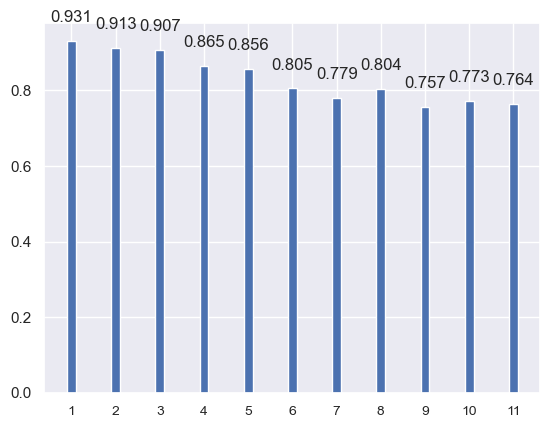

In [64]:
# filter method that selects the best features
f1_score_list = []

for k in range(1, 12):
    selector = SelectKBest(mutual_info_classif, k=k).fit(X_train, y_train_KNN)
    set_X_train = selector.transform(X_train)
    set_X_val = selector.transform(X_val)
    KNN_model.fit(set_X_train, y_train_KNN)
    kbest_pred = KNN_model.predict(set_X_val)
    f1_score_kbest = round(f1_score(y_val_KNN, kbest_pred, average="macro"), 3)
    f1_score_list.append(f1_score_kbest)

fig, ax = plt.subplots()
x = np.arange(1, 12)
y = f1_score_list
ax.bar(x, y, width=0.2)
ax.set_xticks(np.arange(1, 12))
ax.set_xticks(np.arange(1, 12))
ax.set_xticklabels(np.arange(1, 12), fontsize=10)

for i, v in enumerate(y):
    plt.text(x=i + 1, y=v + 0.05, s=str(v), ha="center")

In [65]:
# SelectKBest is a filter method and it is not based on a learning algorithm
# SelectKBest evaluates each feature's statistical relationship with the target variable using a provided scoring function (e.g., f_classif, chi2, mutual_info_classif).
selector = SelectKBest(mutual_info_classif, k=4).fit(X_train, y_train_KNN)
set_X_train = selector.transform(X_train)
set_X_val = selector.transform(X_val)
selected_feature_mask = selector.get_support()
selected_feature_mask
selected_feature = X_train.columns[selected_feature_mask]
print("Features to keep based on SelectKBest fitler method: ", selected_feature)
print()
X_train_KNN = X_train[["BMI", "age", "gender"]]
print(X_train_KNN.shape)
X_val_KNN = X_val[["BMI", "age", "gender"]]
print(X_val_KNN.shape)

Features to keep based on SelectKBest fitler method:  Index(['age', 'gender', 'height', 'BMI'], dtype='object')

(1057, 3)
(457, 3)


In [66]:
# we got very good score in training dataset with only 3 variables and also the validation score improved but we have overfitting
# we try with less k neighbours
KNN_model3 = KNeighborsClassifier(n_neighbors=11, p=1, metric="minkowski").fit(
    X=X_train_KNN, y=y_train_KNN
)
print(
    "Accuracy score KNN Train after feature selection (k = 11): ",
    KNN_model3.score(X_train_KNN, y_train_KNN),
)
print(
    "Accuracy score KNN Validation after feature selection (k = 11): ",
    KNN_model3.score(X_val_KNN, y_val_KNN),
)
pred_KNN3 = KNN_model3.predict(X_val_KNN)
print(
    "F1-score KNN after feature selection (k = 11)",
    f1_score(y_val_KNN, pred_KNN3, average="macro"),
)
print()
KNN_model2 = KNeighborsClassifier(n_neighbors=11, p=1, metric="minkowski")
KNN_model2.fit(X=X_train_KNN, y=y_train_KNN)
print(
    "Accuracy score KNN Train after feature selection (k = 3): ",
    KNN_model2.score(X_train_KNN, y_train_KNN),
)
print(
    "Accuracy score KNN Validation after feature selection (k = 3): ",
    KNN_model2.score(X_val_KNN, y_val_KNN),
)
pred_KNN2 = KNN_model2.predict(X_val_KNN)
print(
    "F1-score KNN after feature selection (k = 3)",
    f1_score(y_val_KNN, pred_KNN2, average="macro"),
)
print()
print("Cnclusion: KNN model performs better with less k-neighbours")

Accuracy score KNN Train after feature selection (k = 11):  0.912961210974456
Accuracy score KNN Validation after feature selection (k = 11):  0.9080962800875274
F1-score KNN after feature selection (k = 11) 0.9067975265835846

Accuracy score KNN Train after feature selection (k = 3):  0.912961210974456
Accuracy score KNN Validation after feature selection (k = 3):  0.9080962800875274
F1-score KNN after feature selection (k = 3) 0.9067975265835846

Cnclusion: KNN model performs better with less k-neighbours


Bagging

In [67]:
bagg_KNN_model = KNeighborsClassifier(n_neighbors=3)
# BaggingClassifer where base estimator is KNN
bagg_KNN = BaggingClassifier(
    estimator=bagg_KNN_model, n_estimators=200, random_state=42
)
bagg_KNN.fit(X_train_KNN, y_train_KNN)
print("Accuracy score Bagging KNN Train:", bagg_KNN.score(X_train_KNN, y_train_KNN))
print("Accuracy score Bagging KNN Validation:", bagg_KNN.score(X_val_KNN, y_val_KNN))
pred_bagg_KNN = bagg_KNN.predict(X_val_KNN)
print("F1-score Bagging KNN:", f1_score(y_val_KNN, pred_bagg_KNN, average="macro"))

Accuracy score Bagging KNN Train: 0.9517502365184485
Accuracy score Bagging KNN Validation: 0.9343544857768052
F1-score Bagging KNN: 0.933888233796185


In [68]:
X_train

,age,alcohol_freq,caloric_freq,devices_perday,gender,height,monitor_calories,parent_overweight,physical_activity_perweek,transportation,veggies_freq,water_daily,BMI
0,-1.135099,0.505419,-2.580585,2.003082,0.931392,0.455183,-0.222828,0.484575,2.379058,1.638570,-0.710073,-1.477928,-0.846925
1,-0.351155,-1.458654,0.387509,0.502545,-1.073662,-0.172968,-0.222828,0.484575,0.724673,0.487761,1.007426,0.001400,-1.496862
2,-0.978310,0.505419,0.387509,0.502545,0.931392,0.350491,-0.222828,0.484575,-0.929711,0.487761,-0.710073,0.001400,-1.628327
3,-0.821521,0.505419,-2.580585,-0.997992,0.931392,-0.487043,-0.222828,0.484575,-0.929711,0.487761,-0.710073,1.480727,-0.185897
4,1.059943,0.505419,0.387509,0.502545,0.931392,0.455183,-0.222828,0.484575,-0.929711,-1.813859,1.007426,0.001400,1.275054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,-0.664733,0.505419,-2.580585,-0.997992,-1.073662,-0.801118,-0.222828,0.484575,0.724673,0.487761,1.007426,0.001400,-0.197736
1053,-0.821521,0.505419,-2.580585,0.502545,-1.073662,-1.533960,-0.222828,0.484575,-0.929711,0.487761,1.007426,0.001400,-0.079208
1054,0.903154,0.505419,0.387509,-0.997992,0.931392,1.606792,-0.222828,0.484575,-0.929711,-1.813859,-0.710073,0.001400,0.840770
1055,1.059943,0.505419,0.387509,-0.997992,-1.073662,-0.801118,-0.222828,0.484575,0.724673,-1.813859,-0.710073,0.001400,-0.442328


In [69]:
bagg_DT = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=200,
    max_samples=0.5,
    max_features=0.8,  # Use only 70% of features
    random_state=42,
)
bagg_DT.fit(X_train, y_train_KNN)
print(
    "Accuracy score Bagging Decision Tree Train (max_depth = 3):",
    bagg_DT.score(X_train, y_train_KNN),
)
print(
    "Accuracy score Bagging Decision Tree Validation (max_depth = 3):",
    bagg_DT.score(X_val, y_val_KNN),
)
pred_bagg_DT = bagg_DT.predict(X_val)
print(
    "F1-score Bagging Decision Tree (max_depth = 3):",
    f1_score(y_val, pred_bagg_DT, average="macro"),
)
print()
DTbase = DecisionTreeClassifier()

bagg_DT2 = BaggingClassifier(
    estimator=DTbase,
    n_estimators=200,
    max_samples=0.5,  # using 50% of the samples to train each decision tree gives the highest result
    max_features=0.8,  # Use only 80% of features
    random_state=42,  # sampling with replacement
)
bagg_DT2.fit(X_train, y_train_KNN)
print(
    "Accuracy score Bagging Decision Tree Train:", bagg_DT2.score(X_train, y_train_KNN)
)
print(
    "Accuracy score Bagging Decision Tree Validation:", bagg_DT2.score(X_val, y_val_KNN)
)
pred_bagg_DT2 = bagg_DT2.predict(X_val)
print(
    "F1-score Bagging Decision Tree:",
    f1_score(y_val_KNN, pred_bagg_DT2, average="macro"),
)

Accuracy score Bagging Decision Tree Train (max_depth = 3): 0.9489120151371807
Accuracy score Bagging Decision Tree Validation (max_depth = 3): 0.9474835886214442
F1-score Bagging Decision Tree (max_depth = 3): 0.9474787824906761

Accuracy score Bagging Decision Tree Train: 0.9877010406811731
Accuracy score Bagging Decision Tree Validation: 0.9606126914660832
F1-score Bagging Decision Tree: 0.9597937688342155


Trees

In [70]:
dt_model = DecisionTreeClassifier(max_depth=5, criterion="entropy", min_samples_leaf=30)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
f1_score(y_val, y_pred, average="macro")

0.9476325294719329

SVM

In [502]:
modelSVM = SVC(kernel="linear", C=10)
modelSVM.fit(X_train, y_train)
y_pred = modelSVM.predict(X_val)
f1 = f1_score(y_val, y_pred, average="macro")
print(f1)

0.9321945085006318


In [72]:
ovo_classifier = OneVsOneClassifier(LinearSVC(random_state=42))
ovo_classifier.fit(X_train, y_train)
y_pred = ovo_classifier.predict(X_val)
f1 = f1_score(y_val, y_pred, average="macro")
print("F1-Score (Macro):", f1)

F1-Score (Macro): 0.9268387870344247


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` 

MLP

In [ ]:
# takes long to run
# mlp = MLPClassifier(hidden_layer_sizes = 10, random_state=15, max_iter=500)
mlp = MLPClassifier(hidden_layer_sizes=(110), max_iter=600)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)
f1_score(y_val.values.ravel(), y_pred, average="macro")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.



0.8915662767453391

Naive Bais

In [504]:
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)
y_pred = base_clf.predict(X_val)
print(f1_score(y_val, y_pred, average="macro"))

0.802080188149179


GaussianProcessClassifier

In [505]:
gpc = GaussianProcessClassifier(kernel=1.0 * RBF(1.0), multi_class="one_vs_rest")
gpc.fit(X_train, y_train)
y_pred = gpc.predict(X_val)
f1 = f1_score(y_val, y_pred, average="macro")
f1

0.7518055739239253

Random Forest

In [75]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
f1_score(y_val, y_pred, average="macro")

0.9510942828411785

Gradient Boosting

In [76]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_val)

macro_f1 = f1_score(y_val, y_pred, average="macro")
print(f"Macro F1-score: {macro_f1}")


Macro F1-score: 0.9375422258922248


### 4.2. Model Optimization

After selecting the best algorithm (set of algorithms), you can try to optimize the performance of your model by fiddling with the algorithms' hyper-parameters and select the options that result on the best overall performance.

Possible ways of doing this can be through:
1. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selectiozn.GridSearchCV.html)
2. [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

**While you are not required to show the results of all combinations of hyperparameters that you tried, you should at least discuss the what were the possible combinations used and which of them resulted in your best performance**|

Grid Search

SVM

In [ ]:
parameters = {"kernel": ("linear", "rbf"), "C": [0.1, 1, 2, 3, 5, 7, 8, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 5, 'kernel': 'linear'}

In [ ]:
svc_model = SVC(kernel="linear", C=5)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
macro_f1

0.9273386314658865

In [ ]:
svc_model = SVC(kernel="linear", C=1, gamma="auto")
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
macro_f1

0.9214803699936638

Random forest

In [ ]:
# takes long to run
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=2,
)

grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
print(f"Macro F1-score: {macro_f1}")
print(f"Best param: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Macro F1-score: 0.9417750872074054
Best param: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
rf_model = RandomForestClassifier(
    random_state=42, n_estimators=200, criterion="entropy"
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
macro_f1

0.9640023819296041

In [ ]:
rf_model = RandomForestClassifier(
    random_state=42, n_estimators=200, criterion="entropy", min_samples_split=10
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
macro_f1

0.9531207215535673

Gradient boosting

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    subsample=0.9,
    init=RandomForestClassifier(
        random_state=42, n_estimators=200, bootstrap=True, criterion="entropy"
    ),
)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_val)
print(gb_model.get_params())
macro_f1 = f1_score(y_val, y_pred, average="macro")
macro_f1

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init__bootstrap': True, 'init__ccp_alpha': 0.0, 'init__class_weight': None, 'init__criterion': 'entropy', 'init__max_depth': None, 'init__max_features': 'sqrt', 'init__max_leaf_nodes': None, 'init__max_samples': None, 'init__min_impurity_decrease': 0.0, 'init__min_samples_leaf': 1, 'init__min_samples_split': 2, 'init__min_weight_fraction_leaf': 0.0, 'init__monotonic_cst': None, 'init__n_estimators': 200, 'init__n_jobs': None, 'init__oob_score': False, 'init__random_state': 42, 'init__verbose': 0, 'init__warm_start': False, 'init': RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42), 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.9, 'tol': 0.0001, 'validation_fracti

0.9553023528939766

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4],
    "subsample": [0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=gb, param_grid=param_grid, cv=5, scoring="f1_macro", verbose=2, n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
print(f"Macro F1-score: {macro_f1}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Macro F1-score: 0.9353298074960301


In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    subsample=0.8,
    init=RandomForestClassifier(
        random_state=42, n_estimators=200, bootstrap=True, criterion="entropy"
    ),
    max_depth=4,
)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
macro_f1

0.9595160540056317

Stacking

In [ ]:
gb_best = GradientBoostingClassifier(
    ccp_alpha=0.0,
    criterion="friedman_mse",
    learning_rate=0.05,
    loss="log_loss",
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=8,
    n_estimators=200,
    subsample=0.6,
    tol=0.0001,
    validation_fraction=0.1,
    verbose=0,
    warm_start=False,
)
svc_best = SVC(
    C=10,
    break_ties=False,
    cache_size=200,
    coef0=0.0,
    decision_function_shape="ovr",
    degree=3,
    gamma="scale",
    kernel="linear",
    max_iter=-1,
    probability=True,
    tol=0.001,
    verbose=False,
    shrinking=True,
)
rf_best = RandomForestClassifier(
    bootstrap=True,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    max_features="sqrt",
    random_state=42,
)
stacking_model = StackingClassifier(
    estimators=[("gb", gb_best), ("svc", svc_best), ("rf", rf_best)],
    final_estimator=LogisticRegression(),
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
print(f"Macro F1-score: {macro_f1}")

Macro F1-score: 0.9596992894967625


In [ ]:
base_models = [
    ("rf", rf_model),
    ("gb", gb_model),
    ("svc", svc_model),
    ("knn", KNN_model),
]
meta_model = LogisticRegression(max_iter=1000)
# LogisticRegression(max_iter=1000)
# RidgeClassifierCV(alphas=(0.1, 1.0, 10.0))
# GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)


stacking_model = StackingClassifier(
    estimators=base_models, final_estimator=meta_model, cv=5
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
print(f"Macro F1-score: {macro_f1}")


Macro F1-score: 0.9641816040225583


In [ ]:
base_models_layer1 = [
    ("rf", rf_model),
    ("gb", gb_model),
    ("svc", svc_model),
    ("knn", KNN_model),
]

stacking_layer2 = StackingClassifier(
    estimators=base_models_layer1,
    final_estimator=GradientBoostingClassifier(
        n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42
    ),
    cv=5,
)

stacking_model = StackingClassifier(
    estimators=[("layer2", stacking_layer2)], final_estimator=LogisticRegression(), cv=5
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
print(f"Macro F1-score: {macro_f1}")

Macro F1-score: 0.9613996800356982


In [ ]:
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    (
        "gb",
        GradientBoostingClassifier(
            learning_rate=0.05,
            max_depth=5,
            min_samples_leaf=3,
            min_samples_split=8,
            n_estimators=100,
            subsample=0.7,
        ),
    ),
    ("svc", SVC(probability=True, kernel="linear")),
]
meta_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=base_models, final_estimator=meta_model, cv=5
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
print(f"Macro F1-score: {macro_f1}")

Macro F1-score: 0.9598805098120915


In [ ]:
gb1 = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=0.8,
    random_state=42,
)
gb2 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    subsample=0.6,
    random_state=42,
)
gb3 = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=7,
    min_samples_split=6,
    min_samples_leaf=3,
    subsample=0.4,
    random_state=42,
)

base_models_layer1 = [("gb1", gb1), ("gb2", gb2), ("gb3", gb3)]

stacking_layer2 = StackingClassifier(
    estimators=base_models_layer1,
    final_estimator=GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42
    ),
    cv=5,
)

stacking_model = StackingClassifier(
    estimators=[("layer2", stacking_layer2)], final_estimator=LogisticRegression(), cv=5
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average="macro")
print(f"Macro F1-score: {macro_f1}")
# the score decreased

Macro F1-score: 0.9490605855865358


<a class="anchor" id="">

# 5. Deploy

</a>

<img src="image/step5.png" style="height:60px">

### 5.0 Training a final model

You used the previous steps of modelling and assessment to determine what would be best strategies when it comes to preprocessing, scaling, feature selection, algorithm and hyper-parameters you could find.

**By this stage, all of those choices were already made**. For that reason, a split between training and validation is no longer necessary. **A good practice** would be to take the initial data and train a final model with all of the labeled data that you have available.

**Everything is figured by this stage**, so, on a first level all you need to do is replicate the exact preprocessing, scaling and feature selection decisions you made before.<br>
When it comes to the final model, all you have to do is creeate a new instance of your best algorithm with the best parameters that you uncovered (no need to try all algorithms and hyper-parameters again).

In [ ]:
data_final = pd.read_csv("obesity_train.csv", index_col="id")
data_final.drop("marrital_status", axis=1, inplace=True)
data_final.drop("region", axis=1, inplace=True)
data_final.drop("siblings", axis=1, inplace=True)
data_final = data_final.drop_duplicates(keep="last")

X_train_all_data = data_final.drop("obese_level", axis=1)
y_train_all_data = data_final["obese_level"]

X_train_enc = X_train_all_data.copy()
y_train_str = y_train_all_data.copy()

# will redefine cat_col_label_enc so no need to go to the begining of the notebook to see them
cat_col_label_enc = [
    "caloric_freq",
    "gender",
    "monitor_calories",
    "parent_overweight",
    "smoke",
    "transportation",
]
cat_col_ord_enc = [
    "alcohol_freq",
    "devices_perday",
    "eat_between_meals",
    "physical_activity_perweek",
    "veggies_freq",
    "water_daily",
]

order = {
    "alcohol_freq": ["Never", "Sometimes", "Frequently", "Always"],
    "devices_perday": ["up to 2", "up to 5", "more than 5"],
    "eat_between_meals": ["Never", "Sometimes", "Frequently", "Always"],
    "physical_activity_perweek": ["1 to 2", "3 to 4", "5 or more"],
    "veggies_freq": ["Never", "Sometimes", "Always"],
    "water_daily": ["less than 1", "1 to 2", "more than 2"],
}

label_enc_dict = {}
ordinal_enc_dict = {}

for col in cat_col_label_enc:
    valid_data = X_train_enc[col].dropna()

    lenc = LabelEncoder()
    lenc.fit(valid_data.unique())

    X_train_enc.loc[X_train_enc[col].notna(), col] = lenc.transform(
        X_train_enc.loc[X_train_enc[col].notna(), col]
    )

for col in cat_col_ord_enc:
    ordenc = OrdinalEncoder(
        categories=[order[col]],
        handle_unknown="use_encoded_value",
        unknown_value=np.nan,
    )
    ordenc.fit(X_train_enc[[col]])
    X_train_enc[col] = ordenc.transform(X_train_enc[[col]]).flatten()

    ordinal_enc_dict[col] = ordenc

target_ord_enc = OrdinalEncoder(
    categories=[
        [
            "Insufficient_Weight",
            "Normal_Weight",
            "Overweight_Level_I",
            "Overweight_Level_II",
            "Obesity_Type_I",
            "Obesity_Type_II",
            "Obesity_Type_III",
        ]
    ]
)

target_ord_enc.fit(y_train_all_data.to_frame())
y_train_enc = pd.DataFrame(
    target_ord_enc.transform(y_train_all_data.to_frame()), columns=["obese_level"]
)

imputer = KNNImputer(n_neighbors=3, weights="uniform", metric="nan_euclidean")
imputer.fit(X_train_enc)
X_train_enc_imp = imputer.transform(X_train_enc)
X_train_enc_imp = pd.DataFrame(X_train_enc_imp, columns=X_train_enc.columns)

columns_to_round = [
    "caloric_freq",
    "gender",
    "monitor_calories",
    "parent_overweight",
    "smoke",
    "transportation",
    "alcohol_freq",
    "devices_perday",
    "eat_between_meals",
    "physical_activity_perweek",
    "veggies_freq",
    "water_daily",
]

X_train_enc_imp[columns_to_round] = (
    X_train_enc_imp[columns_to_round].round().astype(int)
)

X_train_enc_imp["BMI"] = X_train_enc_imp["weight"] / (X_train_enc_imp["height"] ** 2)


obese_level_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III",
]
y_train_reset_index = y_train_all_data.reset_index()
Xy = X_train_enc_imp.join(y_train_reset_index)
Xy["obese_level"] = pd.Categorical(
    Xy["obese_level"], categories=obese_level_order[::-1]
)
Xy.drop("id", axis=1, inplace=True)

index_1 = Xy[(Xy["BMI"] > 30) & (Xy["obese_level"] == "Normal_Weight")].index
Xy = Xy.drop(index_1).reset_index(drop=True)

index_2 = Xy[(Xy["BMI"] > 40) & (Xy["obese_level"] == "Obesity_Type_I")].index
Xy = Xy.drop(index_2).reset_index(drop=True)

index_3 = Xy[(Xy["BMI"] < 23) & (Xy["obese_level"] == "Overweight_Level_II")].index
Xy = Xy.drop(index_3).reset_index(drop=True)

scale_transformer = StandardScaler()
X_train_enc_imp = Xy.drop("obese_level", axis=1)
y_train_str = Xy["obese_level"]

y_train_enc = pd.DataFrame(
    target_ord_enc.transform(y_train_str.to_frame()), columns=["obese_level"]
)
scale_transformer.fit(X_train_enc_imp)
X_train_enc_imp_scl = pd.DataFrame(
    scale_transformer.transform(X_train_enc_imp), columns=X_train_enc_imp.columns
)


X_train_all_data = X_train_enc_imp_scl.copy()
y_train_all_data = y_train_enc.copy()
X_train_all_data.drop(
    ["weight", "eat_between_meals", "meals_perday", "smoke"], axis=1, inplace=True
)

print(
    X_train_all_data.shape,
    X_train_enc_imp.shape,
    y_train_all_data.shape,
    y_train_str.shape,
)

(1512, 13) (1512, 17) (1512, 1) (1512,)


In [ ]:
base_models = [
    ("rf", rf_model),
    ("gb", gb_model),
    ("svc", svc_model),
    ("knn", KNN_model),
]
meta_model = RidgeClassifierCV(alphas=(0.1, 1.0, 10.0))

stacking_model = StackingClassifier(
    estimators=base_models, final_estimator=meta_model, cv=5
)

stacking_model.fit(X_train_all_data, y_train_all_data.values.ravel())

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(init=RandomForestClassifier(criterion='entropy',
                                                                                       n_estimators=200,
                                                                                       random_state=42),
                                                           n_estimators=200,
                                                           subsample=0.9)),
                               ('svc', SVC(C=1, gamma='auto', kernel='linear')),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=11, p=1))],
                   final_estimator=RidgeClassifierCV())

### 5.1. Import and Transform your test data

Remember, the test data does not have the `outcome` variable.

In [ ]:
data_test = pd.read_csv("obesity_test.csv", index_col="id")
data_test.drop(
    "marrital_status", axis=1, inplace=True
)  # as you may see from data.info() martial status is completely null, we will drop it
data_test.drop(
    "region", axis=1, inplace=True
)  # as we seen in plots there is only one region in the dataset (LatAm), we will drop it
data_test.drop(
    "siblings", axis=1, inplace=True
)  # we believe that amount of siblings is not a good predictor of obesity
X_test_enc = data_test.copy()

for col in cat_col_label_enc:
    X_test_enc.loc[X_test_enc[col].notna(), col] = label_enc_dict[col].transform(
        X_test_enc.loc[X_test_enc[col].notna(), col]
    )
# OrdinalEncoder for ordinal categorical features

for col in cat_col_ord_enc:
    X_test_enc[col] = ordinal_enc_dict[col].transform(X_test_enc[[col]]).flatten()
X_test_enc_imp = imputer.transform(X_test_enc)
index_col = X_test_enc.index
X_test_enc_imp = imputer.transform(X_test_enc)
X_test_enc_imp = pd.DataFrame(
    X_test_enc_imp, columns=X_test_enc.columns, index=index_col
)

columns_to_round = [
    "caloric_freq",
    "gender",
    "monitor_calories",
    "parent_overweight",
    "smoke",
    "transportation",
    "alcohol_freq",
    "devices_perday",
    "eat_between_meals",
    "physical_activity_perweek",
    "veggies_freq",
    "water_daily",
]
X_test_enc_imp[columns_to_round] = X_test_enc_imp[columns_to_round].round().astype(int)
X_test_enc_imp_copy = X_test_enc_imp.copy()
for col in cat_col_label_enc:
    X_test_enc_imp_copy[col] = label_enc_dict[col].inverse_transform(
        X_test_enc_imp_copy[col]
    )


for col in cat_col_ord_enc:
    transformed_data = ordinal_enc_dict[col].inverse_transform(
        X_test_enc_imp_copy[col].to_numpy().reshape(-1, 1)
    )
    X_test_enc_imp_copy[col] = transformed_data.ravel()
X_test_enc_imp["BMI"] = X_test_enc_imp["weight"] / (X_test_enc_imp["height"] ** 2)
X_test_enc_imp_scl = pd.DataFrame(
    scale_transformer.transform(X_test_enc_imp),
    columns=X_test_enc_imp.columns,
    index=index_col,
)
X_test_enc_imp_scl.drop(
    ["weight", "meals_perday", "eat_between_meals", "smoke"],
    axis=1,
    inplace=True,
)

### 5.2. Obtain Predictions on the test data from your final model

In [ ]:
y_test = stacking_model.predict(X_test_enc_imp_scl)
y_test = y_test.reshape(-1, 1)

### 5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file

In [ ]:
answers = pd.DataFrame(
    {
        "id": index_col,
        "obese_level": target_ord_enc.inverse_transform(
            y_test.reshape(-1, 1)
        ).flatten(),
    }
)
answers.to_csv("answer2.csv", index=False)

Submit the csv file to Kaggle to obtain the model performance of your model on the test data.